<a href="https://colab.research.google.com/github/fenix800/pdi-trabajo-final/blob/main/notebooks/Red_B_Clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requisitos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



# Cargada de datos

In [ ]:
!gdown 1yge7wZWm8LDdt64OsvL6bX0v5Ze5OonS
!gdown 119oo6Tmt1qwcN__Gj6ea0KJeHwY_oVE7

Downloading...
From: https://drive.google.com/uc?id=1yge7wZWm8LDdt64OsvL6bX0v5Ze5OonS
To: /content/X.npy
100% 20.9M/20.9M [00:00<00:00, 193MB/s]
Downloading...
From: https://drive.google.com/uc?id=119oo6Tmt1qwcN__Gj6ea0KJeHwY_oVE7
To: /content/y.npy
100% 16.8k/16.8k [00:00<00:00, 50.5MB/s]


In [ ]:
X_raw = np.load('X.npy')      # (522, 40000)
X_raw = X_raw/255.
y = np.load('y.npy')

X = []
size = (28,28)

for x in X_raw:
    # x viene como vector de 40000 -> lo volvemos imagen 200x200
    x_img = x.reshape(200, 200)
    X.append(resize(x_img, size))

X = np.array(X)

In [ ]:
X.shape

(522, 28, 28)

In [ ]:
y.shape

(522,)

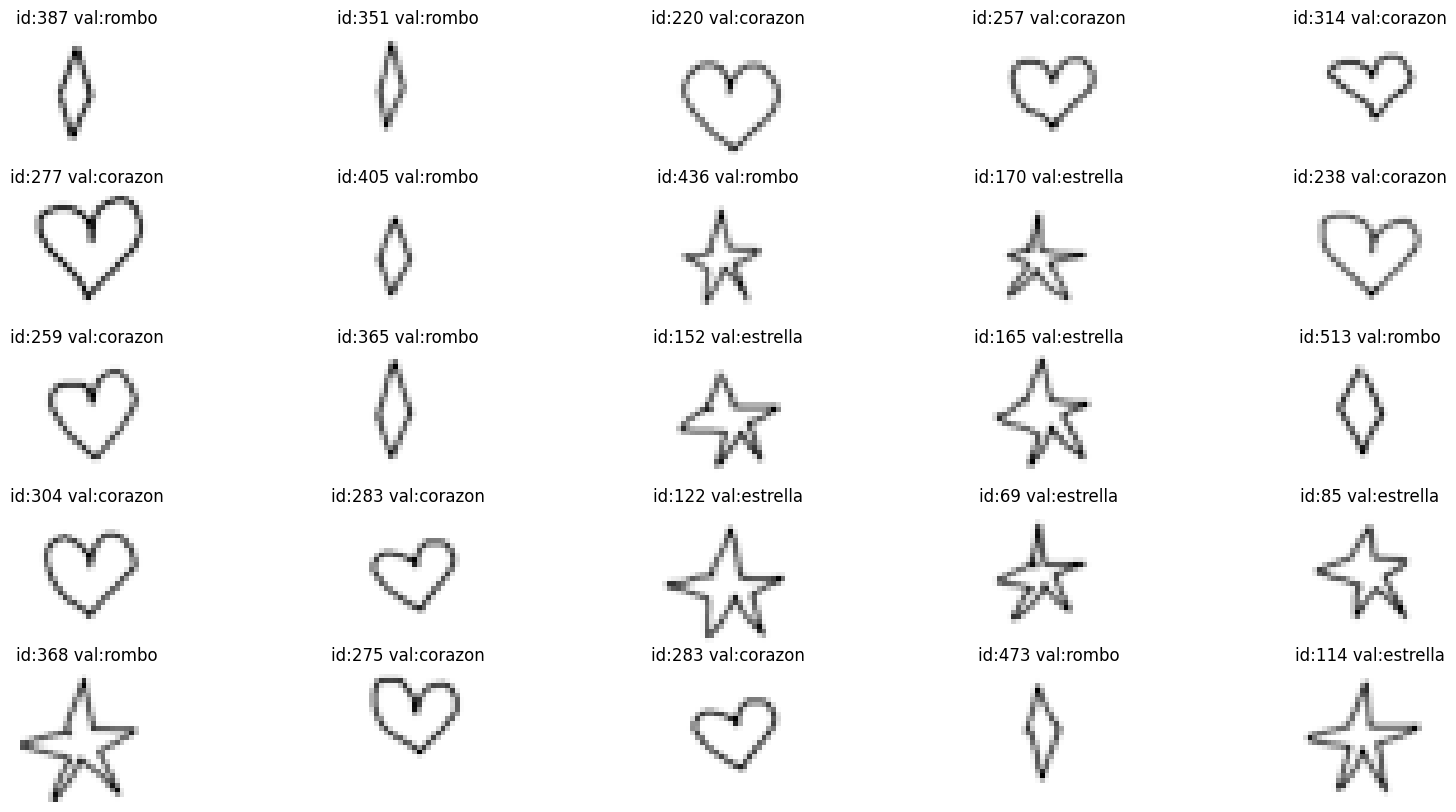

In [ ]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Entrenamiento del modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(417, 28, 28, 1) (105, 28, 28, 1)


In [ ]:
bs = 16  # batch size
lr = 0.0001  # learning rate

# Tus clases reales (orden fijo)
class_mapping = {'estrella': 0, 'corazon': 1, 'rombo': 2}

y_train = np.array([class_mapping[label] for label in y_train])
y_test  = np.array([class_mapping[label] for label in y_test])

y_train = y_train.astype(int)
y_test  = y_test.astype(int)

In [ ]:
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')   # 3 clases: estrella, corazon, rombo
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,643 (940.01 KB)

 Trainable params: 240,643 (940.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=800, validation_data=(X_test, y_test))
model.save('modelo_entrenado.h5')

Epoch 1/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.3244 - loss: 1.0961 - val_accuracy: 0.3524 - val_loss: 1.0952
Epoch 2/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3891 - loss: 1.0939 - val_accuracy: 0.3524 - val_loss: 1.0950
Epoch 3/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3504 - loss: 1.0951 - val_accuracy: 0.3524 - val_loss: 1.0948
Epoch 4/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3548 - loss: 1.0950 - val_accuracy: 0.3524 - val_loss: 1.0946
Epoch 5/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3498 - loss: 1.0941 - val_accuracy: 0.3524 - val_loss: 1.0944
Epoch 6/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3460 - loss: 1.0947 - val_accuracy: 0.3524 - val_loss: 1.0942
Epoch 7/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3592 - loss: 1.0945 - val_accuracy: 0.3524 - val_loss: 1.0940
Epoch 8/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3499 - loss: 1.0944 - val_accuracy: 0.3524 - 

# Probando el modelo

In [ ]:
#Probando modelo
etiqueta_map = {0: 'estrella', 1: 'corazon', 2: 'rombo'}

In [ ]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombre_figura = etiqueta_map.get(label, 'Desconocida')

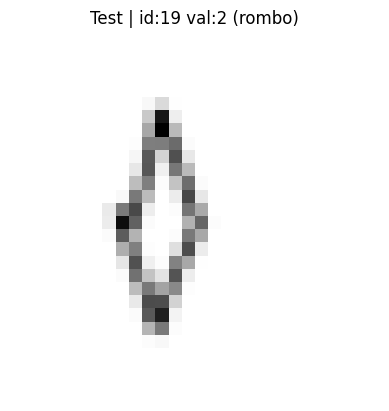

In [ ]:
plt.title('Test | id:{} val:{} ({})'.format(idx, label, nombre_figura))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

In [ ]:
#Usando el modelo
salida = model.predict(im[None,:,:,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


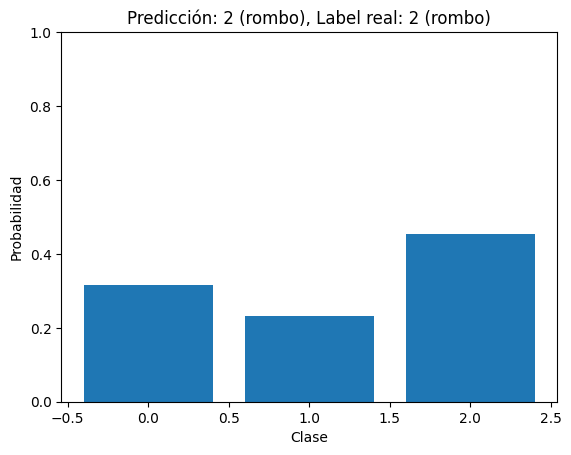

In [ ]:
nombre_pred = etiqueta_map[salida.argmax()]   # nombre de la figura que predice
nombre_real = etiqueta_map[label]             # nombre de la figura real

plt.figure()
plt.title("Predicción: {} ({}), Label real: {} ({})".format(
    salida.argmax(), nombre_pred, label, nombre_real))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()

In [ ]:
# Evaluación final de la Red B
loss_B, acc_B = model.evaluate(X_test, y_test, verbose=0)
print(f"Red B - Test loss: {loss_B:.4f}")
print(f"Red B - Test accuracy: {acc_B:.4f}")

Red B - Test loss: 0.8645
Red B - Test accuracy: 0.9429


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


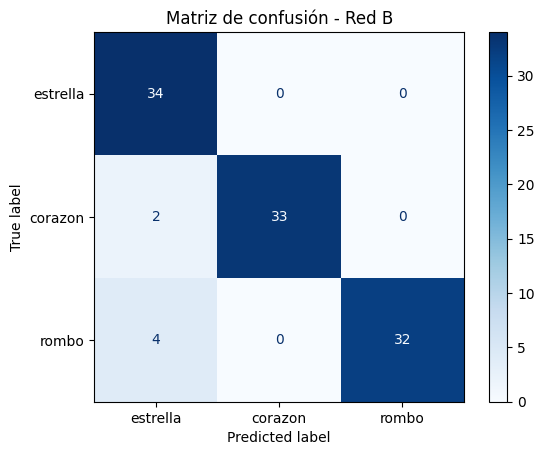

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predicciones del modelo B sobre el test
y_pred_B = model.predict(X_test).argmax(axis=1)

cm_B = confusion_matrix(y_test, y_pred_B)
disp = ConfusionMatrixDisplay(
    cm_B,
    display_labels=['estrella', 'corazon', 'rombo']
)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión - Red B")
plt.show()

In [ ]:
model.save("modelo_redB.h5")

In [ ]:
# Cargar modelos
model_A = load_model("modelo_redA.h5")   # Red A
model_B = load_model("modelo_redB.h5")   # Red B

y_true = y_test

y_pred_A = np.argmax(model_A.predict(X_test), axis=1)
y_pred_B = np.argmax(model_B.predict(X_test), axis=1)

acc_A = accuracy_score(y_true, y_pred_A)
acc_B = accuracy_score(y_true, y_pred_B)

print("Accuracy Red A:", acc_A)
print("Accuracy Red B:", acc_B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step
Accuracy Red A: 0.9619047619047619
Accuracy Red B: 0.9428571428571428


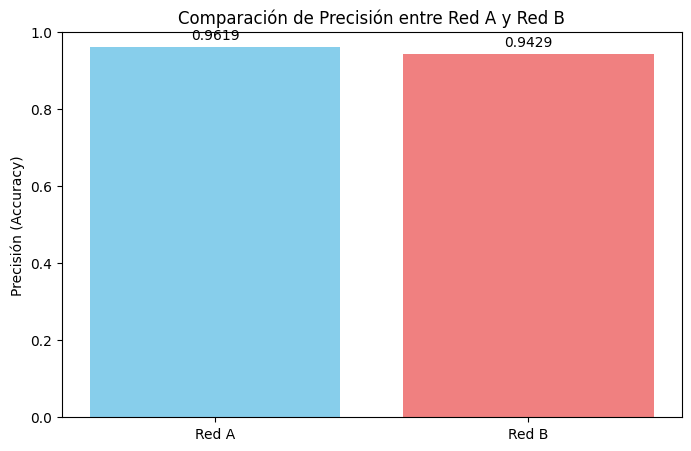

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Red A', 'Red B']
accuracies = [acc_A, acc_B]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.ylabel('Precisión (Accuracy)')
plt.title('Comparación de Precisión entre Red A y Red B')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')

plt.show()